In [44]:

import numpy as np 
import pandas as pd 
from scipy.stats import randint
import pandas as pd 
import matplotlib.pyplot as plt 
from pandas import set_option
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold 
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV  
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics 
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.metrics import classification_report

Nhập tập dữ liệu bằng cách sử dụng khung pandas. Khung dữ liệu được tải trong biến BankCredit .

In [45]:
BankCredit = pd.read_csv("UCI_Credit_Card.csv")

Sử dụng thuộc tính shape của Pandas Dataframe để kiểm tra hình dạng của khung dữ liệu.
Để in hình dạng của khung dữ liệu

In [46]:
print(f'The shape of the dataframe is {BankCredit.shape}')
print()

The shape of the dataframe is (30000, 25)



Sử dụng hàm info() của Pandas Dataframe để hiển thị kiểu dữ liệu của từng cột.

In [47]:
print(BankCredit.info())
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

Sử dụng hàm replace từ Python để thay thế ? bằng Numpy NaN. Nhớ sử dụng thuộc tính inplace để thay thế khung dữ liệu gốc.

In [48]:
BankCredit.replace(to_replace='?', value=np.nan, inplace=True)

In [49]:
print(BankCredit.describe(include='all'))
print()

                 ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802

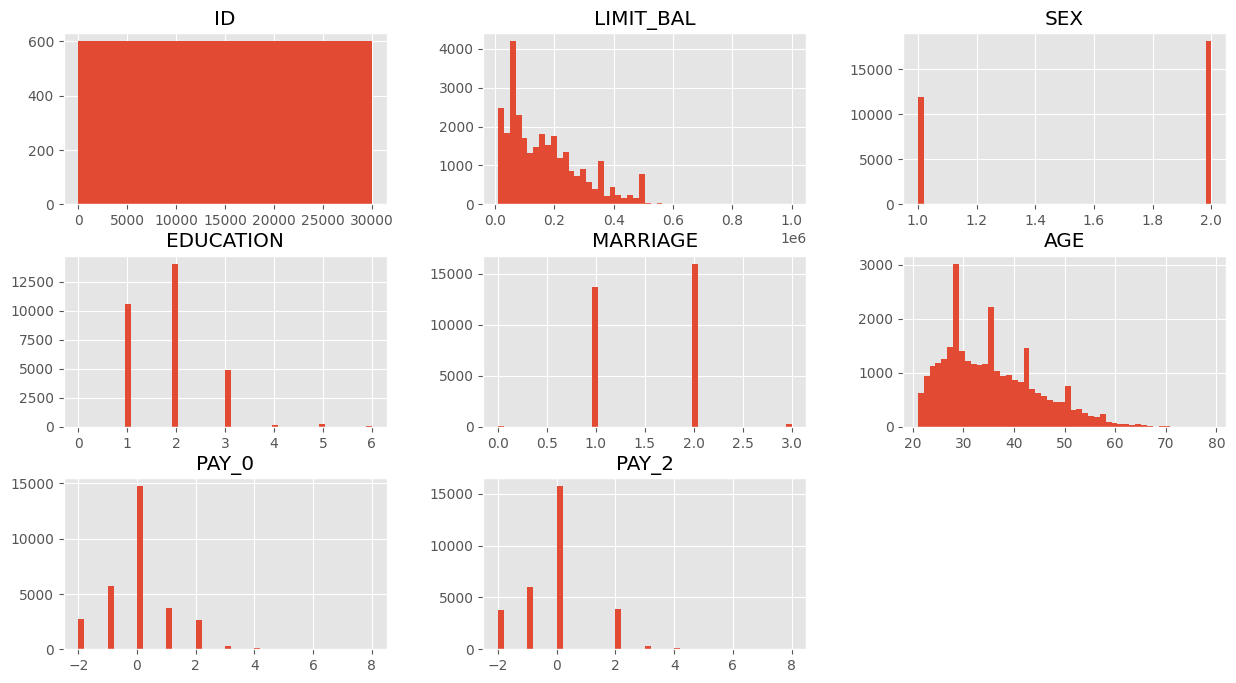

In [69]:
BankCredit[['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE','AGE', 'PAY_0', 'PAY_2']].hist(bins=50, figsize=(15,8))
plt.show()

In [75]:
print(BankCredit['PAY_AMT1'].value_counts())
print(BankCredit.isnull().sum()

SyntaxError: incomplete input (3650024644.py, line 2)

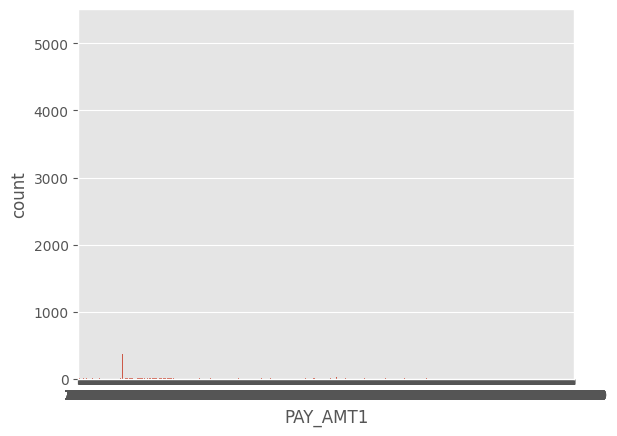

In [80]:
sns.countplot(x='PAY_AMT1', data=BankCredit, linewidth=3)
plt.show()

In [78]:
import seaborn as sns

In [74]:
BankCredit['PAY_0'].fillna(BankCredit['PAY_0'].mode()[0], inplace=True)
BankCredit['PAY_4'].fillna(BankCredit['PAY_4'].mode()[0], inplace=True)

In [55]:
print(BankCredit.isnull().sum())

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64


In [82]:
X = BankCredit.drop(['LIMIT_BAL','EDUCATION','default.payment.next.month'], axis=1)
y = BankCredit['default.payment.next.month']

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [86]:
from sklearn.preprocessing import OneHotEncoder
cols = ['EDUCATION','PAY_0  ','PAY_3','PAY_4','PAY_5','PAY_6']
encoder = OneHotEncoder(sparse=False)
X_train = encoder.fit_transform(X_train[cols])
X_test = encoder.transform(X_test[cols])

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [85]:
import sklearn; print(sklearn.__version__)

1.5.2


In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

NameError: name 'X_train' is not defined